UNSUPERVISED LEARNING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets 

Iris=datasets.load_iris()
df=pd.DataFrame(Iris.data,columns=Iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
x=df.iloc[:, [0,1,2,3]].values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(init="k-means++", n_clusters=i,n_init=10, max_iter=300, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\srees\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\srees\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\srees\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\srees\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

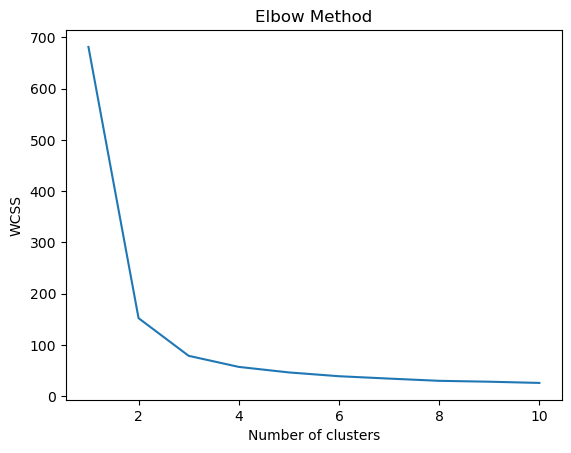

In [7]:
#optimum number of clusters would be obtained at the elbow point
#Let's plot a line graph of the results obtained and Look for the elbow point
plt.plot(range (1,11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

C:\Users\srees\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


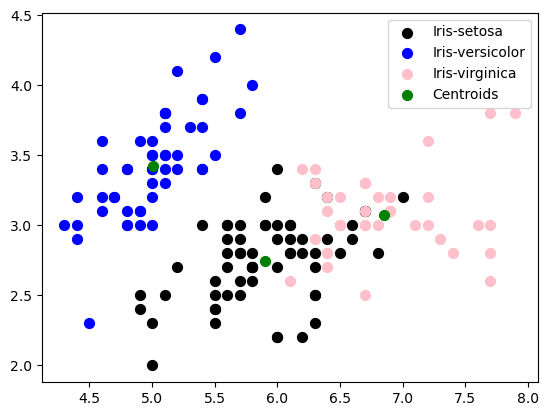

In [11]:
#The optimum number of cluster appears at the elbow point
#Therefore, it is visible that "3" being the elbow point should be equal to the optimum number
#of clusters for this data
#Applying Kmeans to the dataset/ Creating Kmeans classifier

kmeans=KMeans(init="k-means++",n_clusters=3, n_init=10, max_iter=300, random_state=0)
y=kmeans.fit_predict(x)
#y represents the cluster Label

#Visualising the clusters
plt.scatter(x[y==0,0], x[y==0,1], c="black", s = 50,label="Iris-setosa")
plt.scatter(x[y==1,0], x[y==1,1], c="blue", s = 50 , label="Iris-versicolor")
plt.scatter(x[y==2,0], x[y==2,1], c="pink", s = 50,label="Iris-virginica")

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], c="green",
s = 50,label="Centroids")

#describing the elements of the graph
plt.legend()